In [29]:
import matplotlib.pyplot as plt

In [74]:
def result(result, sb3):
    with open(result) as file_in:
        eps = []
        rewards = []
        for line in file_in:
            if sb3:
                line = line.replace(" ", "")
                line = line.split("|")
                if len(line) > 1:
                    if line[1] == 'episodes':
                        eps.append(int(line[2]))
                    if line[1] == 'ep_rew_mean':
                        rewards.append(float(line[2].strip()))
            else:
                line = line.split(", ")
                if len(line) < 3:
                    continue
                ep = line[0].split(". ")
                reward = line[2].split(": ")
                eps.append(int(ep[1]))
                rewards.append(float(reward[1].strip()))
    return eps, rewards

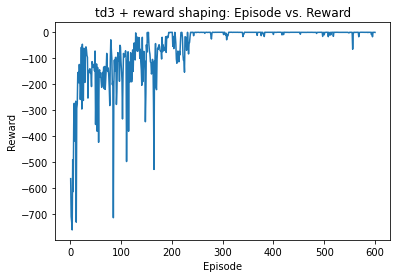

In [75]:
eps_td3_reward_shaping, rewards_td3_reward_shaping = result('log_td3_reward_shaping.txt', sb3 = False)

plt.plot(eps_td3_reward_shaping, rewards_td3_reward_shaping)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('td3 + reward shaping: Episode vs. Reward')
plt.savefig('td3+reward_shaping.png')
plt.show()

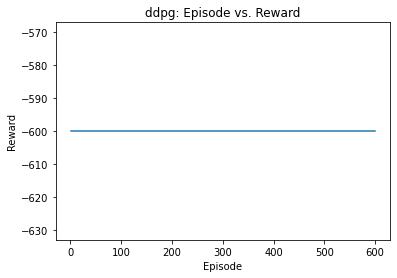

In [76]:
eps_ddpg, rewards_ddpg = result('log_ddpg.txt',sb3 = False)

plt.plot(eps_ddpg, rewards_ddpg)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('ddpg: Episode vs. Reward')
plt.savefig('ddpg.png')
plt.show()

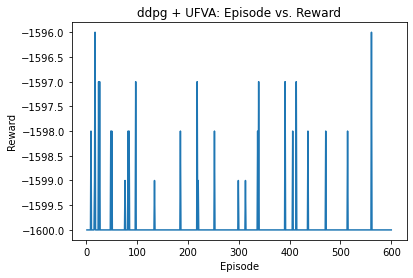

In [77]:
eps_ddpg_UFVA, rewards_ddpg_UFVA = result('log_ddpg+UFVA.txt', sb3 = False)

plt.plot(eps_ddpg_UFVA, rewards_ddpg_UFVA)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('ddpg + UFVA: Episode vs. Reward')
plt.savefig('ddpg+UFVA.png')
plt.show()

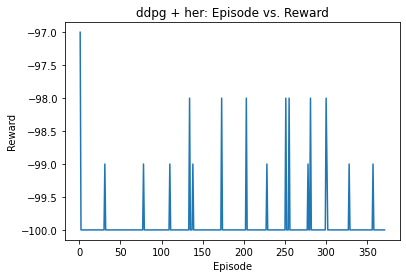

In [78]:
eps_ddpg_her, rewards_ddpg_her = result('ddpg_her.txt', sb3 = False)

plt.plot(eps_ddpg_her, rewards_ddpg_her)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('ddpg + her: Episode vs. Reward')
plt.savefig('ddpg+her.png')
plt.show()

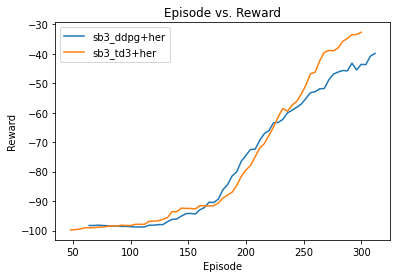

In [79]:
eps_sb3_ddpg, rewards_sb3_ddpg = result('sb3_ddpg.txt', sb3 = True)
eps_sb3_ddpg_her, rewards_sb3_ddpg_her = result('sb3_ddpg+her.txt', sb3 = True)
eps_sb3_td3_her, rewards_sb3_td3_her = result('sb3_td3+her.txt', sb3 = True)

# plt.plot(eps_sb3_ddpg, rewards_sb3_ddpg, label = 'sb3_ddpg')
plt.plot(eps_sb3_ddpg_her, rewards_sb3_ddpg_her, label = 'sb3_ddpg+her')
plt.plot(eps_sb3_td3_her, rewards_sb3_td3_her, label = 'sb3_td3+her')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward')
plt.savefig('sb3_ddpg+her_td3+her.png')
plt.show()